In [1]:
#231228 결측값 처리(p.4)
import pandas as pd
df=pd.read_csv('c:/data/test/sample.csv')
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [2]:
df.isnull() # → 결측값 여부 확인

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


<Axes: >

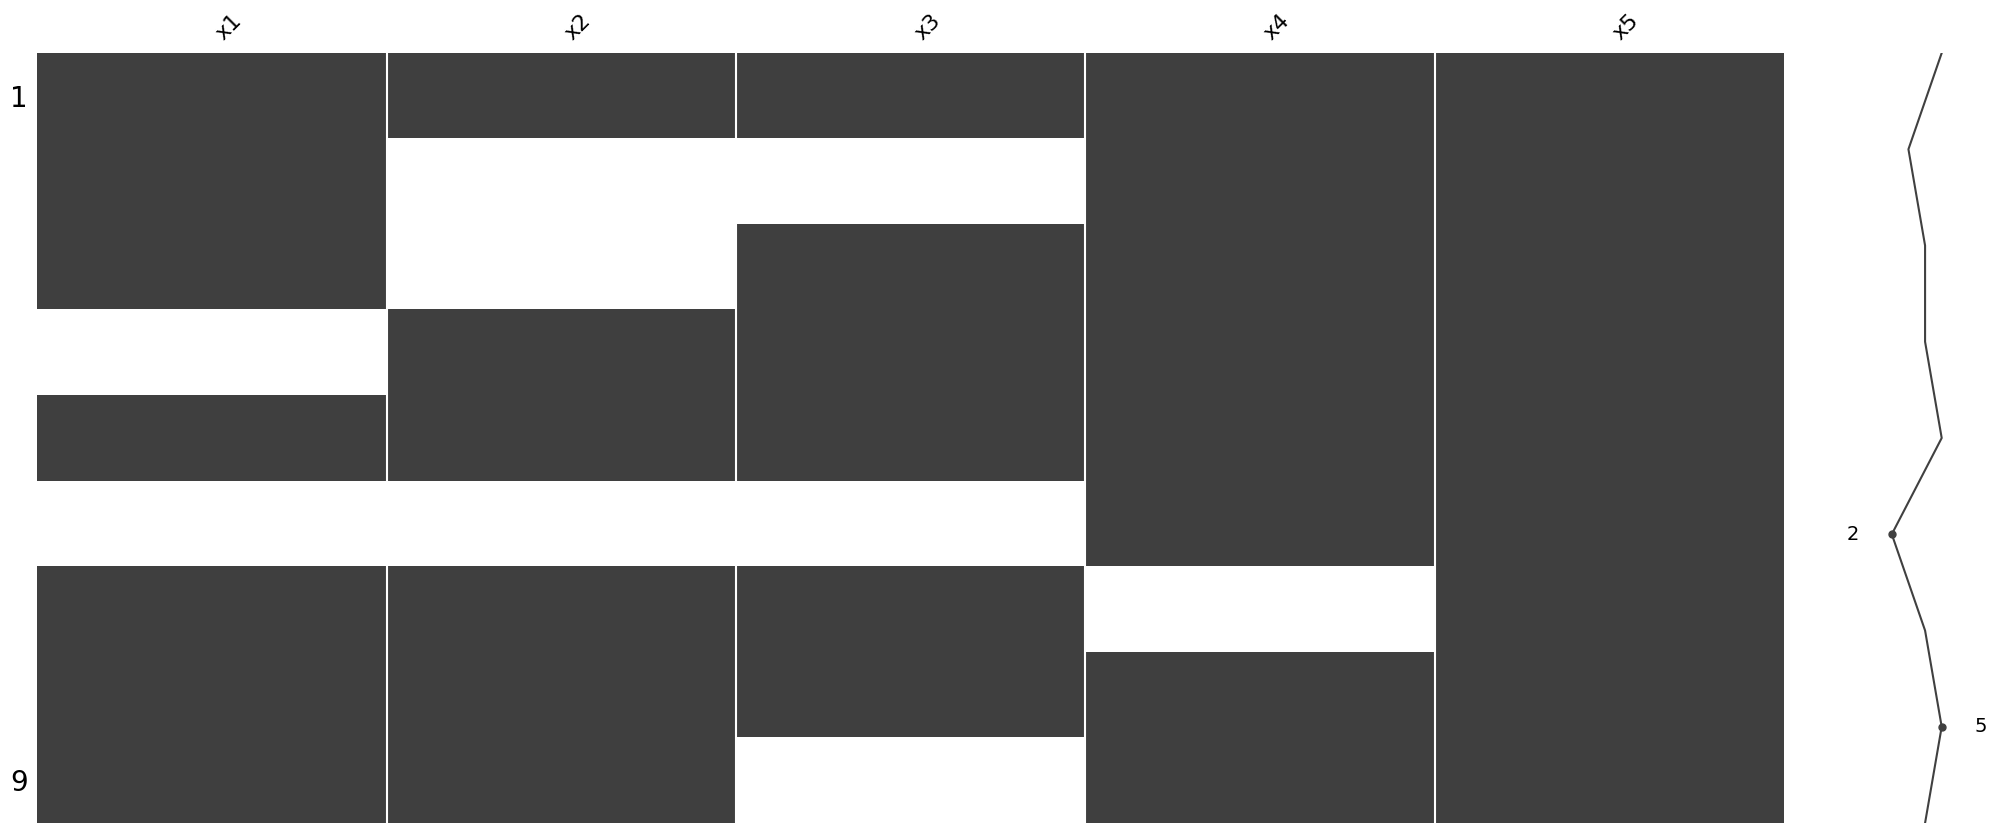

In [3]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
#흰색 - 결측값
#스파크라인(spark line) - 각 샘플의 데이터 완성도를 표현

<Axes: >

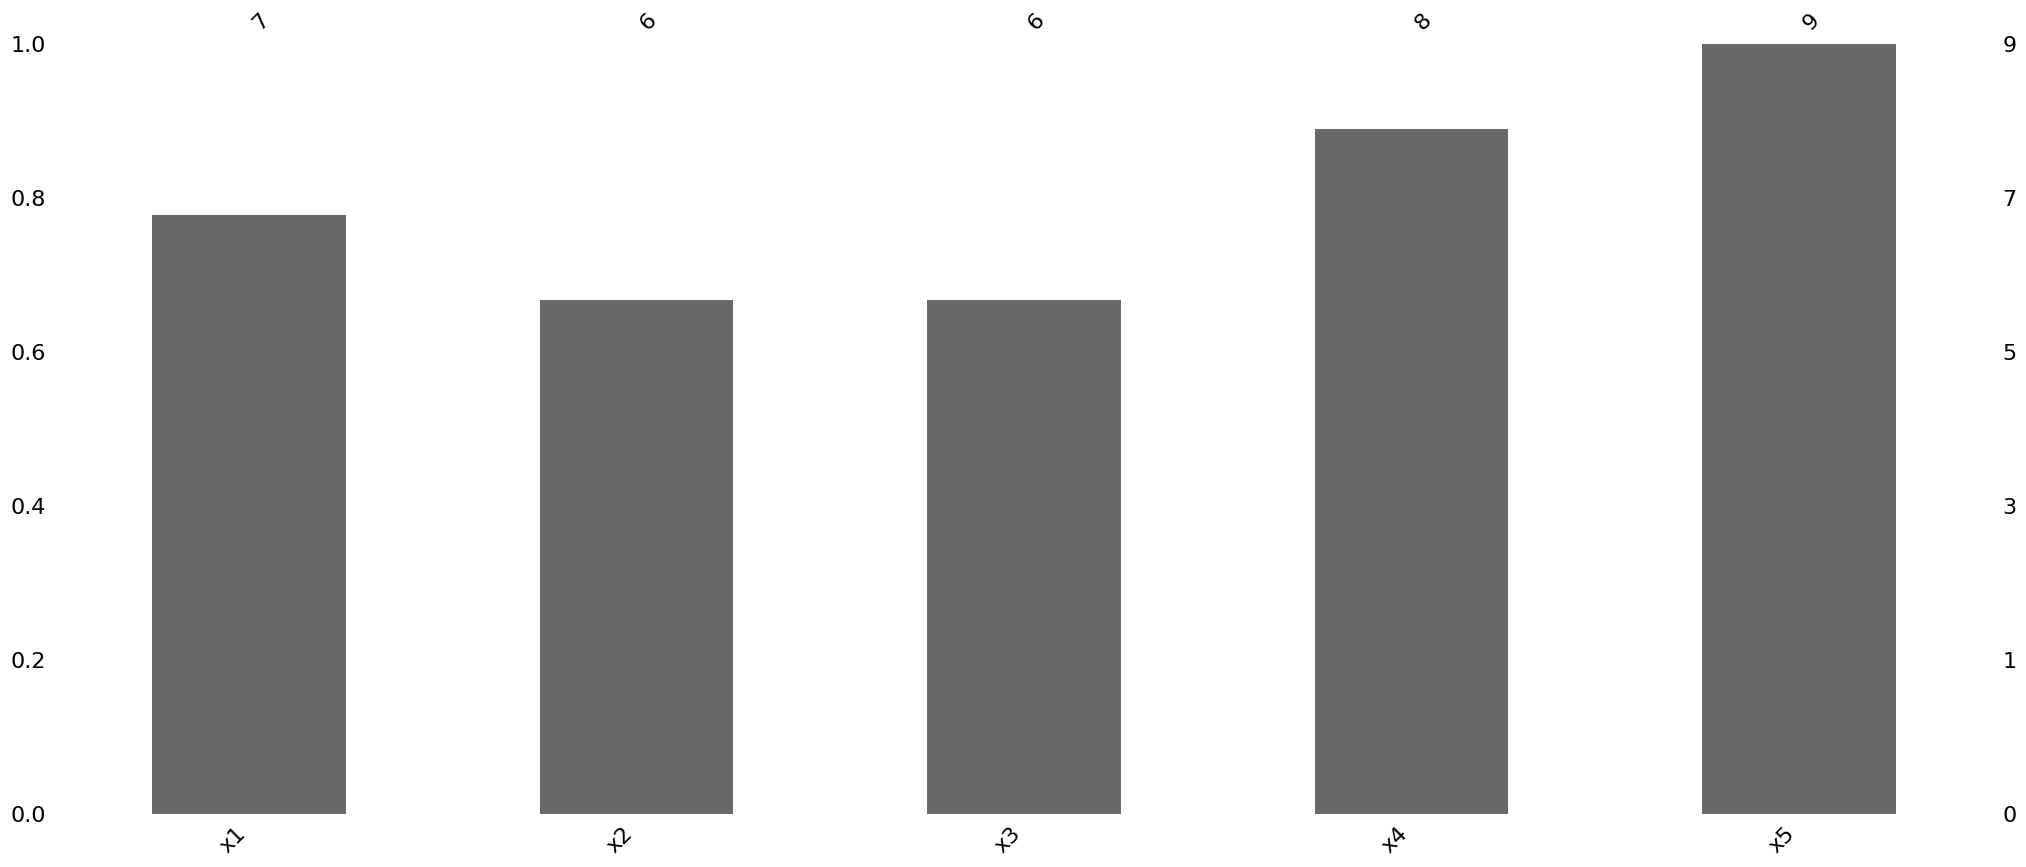

In [4]:
msno.bar(df) #필드별 데이터 완성도

In [5]:
import seaborn as sns
titanic=sns.load_dataset('titanic')
titanic.tail()

#=======
# survived : 생존 여부
# pclass : 승객의 클래스
# sex : 성별. male, female로 표기
# sibsp : 형제 혹은 자매의 수
# parch : 부모 혹은 자녀의 수
# fare : 탑승 요금
# embarked : 출발지의 고유 이니셜
# class : 선실의 클래스
# who : male, female을 man, woman으로 표기
# adult_male : 성인 남성 인지 아닌지 여부
# deck : 선실 고유 번호의 가장 앞자리 알파벳(A ~ G)
# embark_town : 출발지
# alive : 생존 여부 데이터를 yes 혹은 no로 표기
# alone : 가족이 없는 경우 True

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


<Axes: >

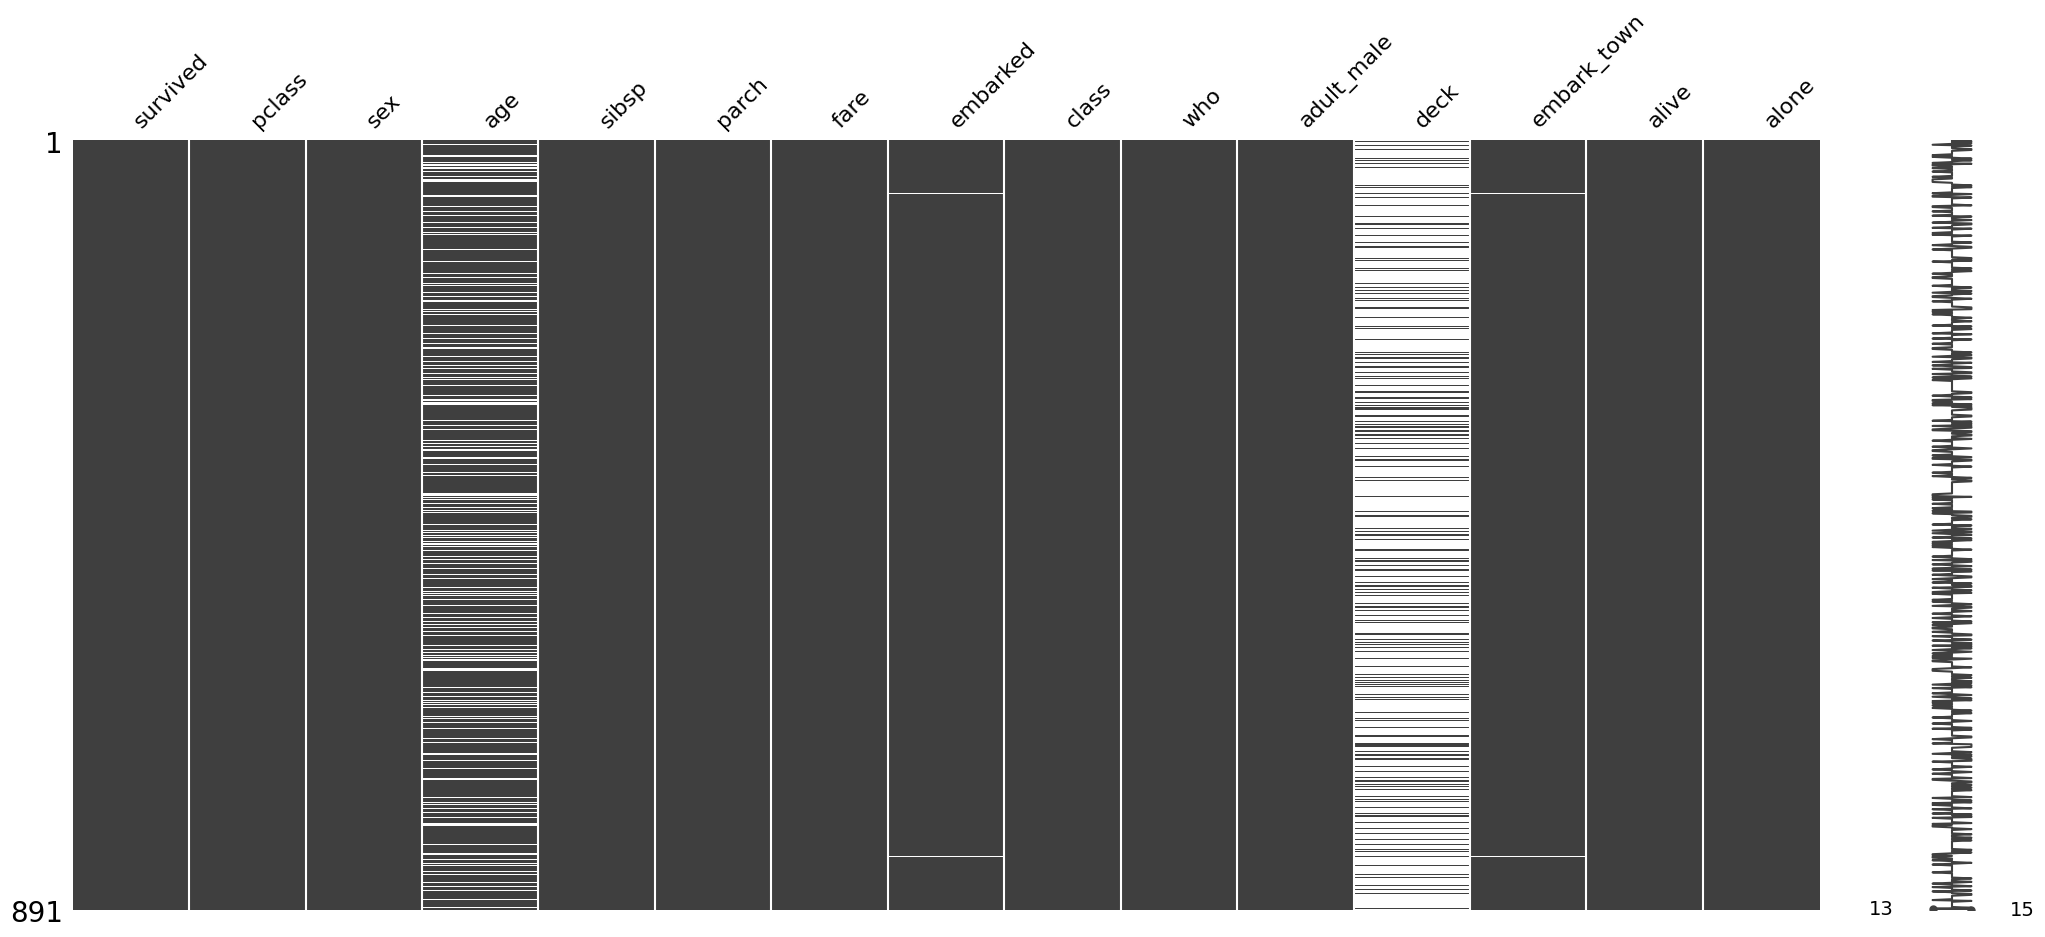

In [6]:
msno.matrix(titanic)
#age,deck 등의 필드에 결측값이 많음

<Axes: >

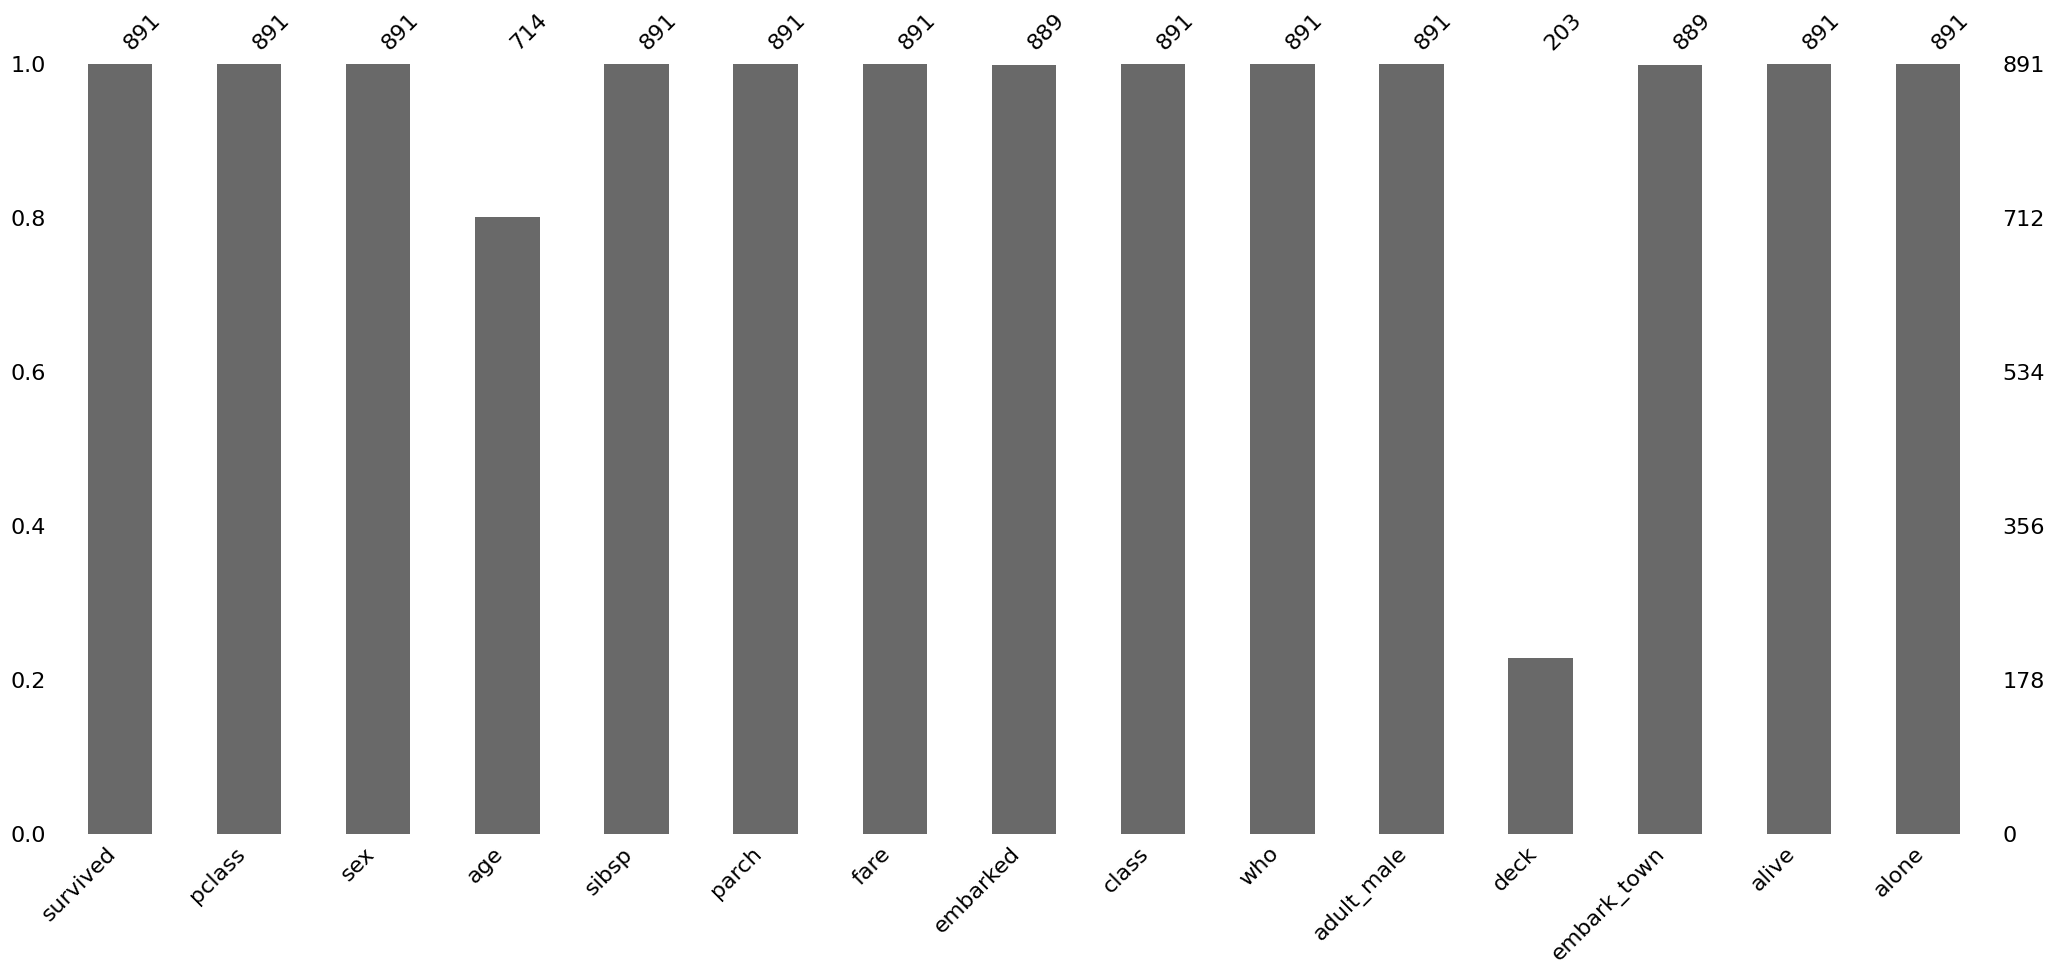

In [7]:
msno.bar(titanic) #필드별로 결측값 확인

In [8]:
titanic.dropna() #결측값이 있는 모든 행을 삭제

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [9]:
titanic.dropna(axis=1)  #결측값이 있는 필드 제거
#axis= 0 가로방향, 1 세로방향

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [10]:
#7개 이상 비결측 데이터가 있는 필드만 남기고 제거
titanic.dropna(thresh=7, axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
from sklearn.impute import SimpleImputer
# 결측값을 mean 평균값으로, median 중위수로, most_freqeunt 최빈수로 대체
# 일반적으로 실수형 연속값인 경우 평균 또는 중위수
# 정규분포인 경우 평균을 사용하는 것이 유리하고 비정규분포인 경우, 중위수가 유리함
# 카테고리인 경우 최빈값을 사용하는 것이 좋음

imputer=SimpleImputer(strategy='most_frequent')
titanic=pd.DataFrame(imputer.fit_transform(titanic), columns=titanic.columns)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,24.0,1,2,23.45,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True


Text(0.5, 1.0, 'embark_town')

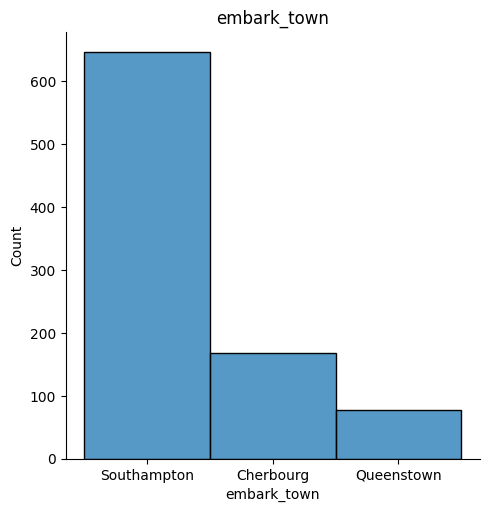

In [12]:
#출발지
sns.displot(titanic.embark_town)
plt.title('embark_town')

28.566969696969696
24.0


Text(0.5, 1.0, 'age')

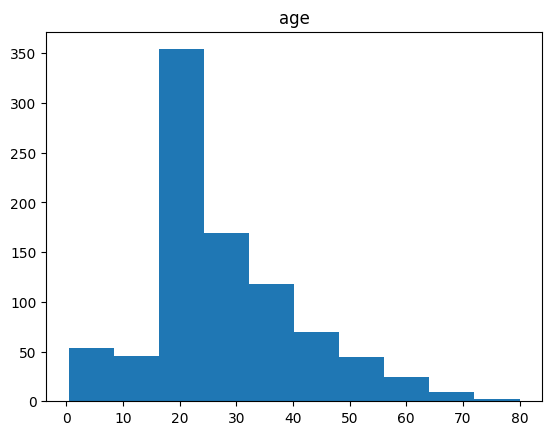

In [13]:
import numpy as np
print(np.mean(titanic.age))
print(np.median(titanic.age))

plt.hist(titanic.age)
plt.title('age')
#비대칭(비정규분포)

<Axes: >

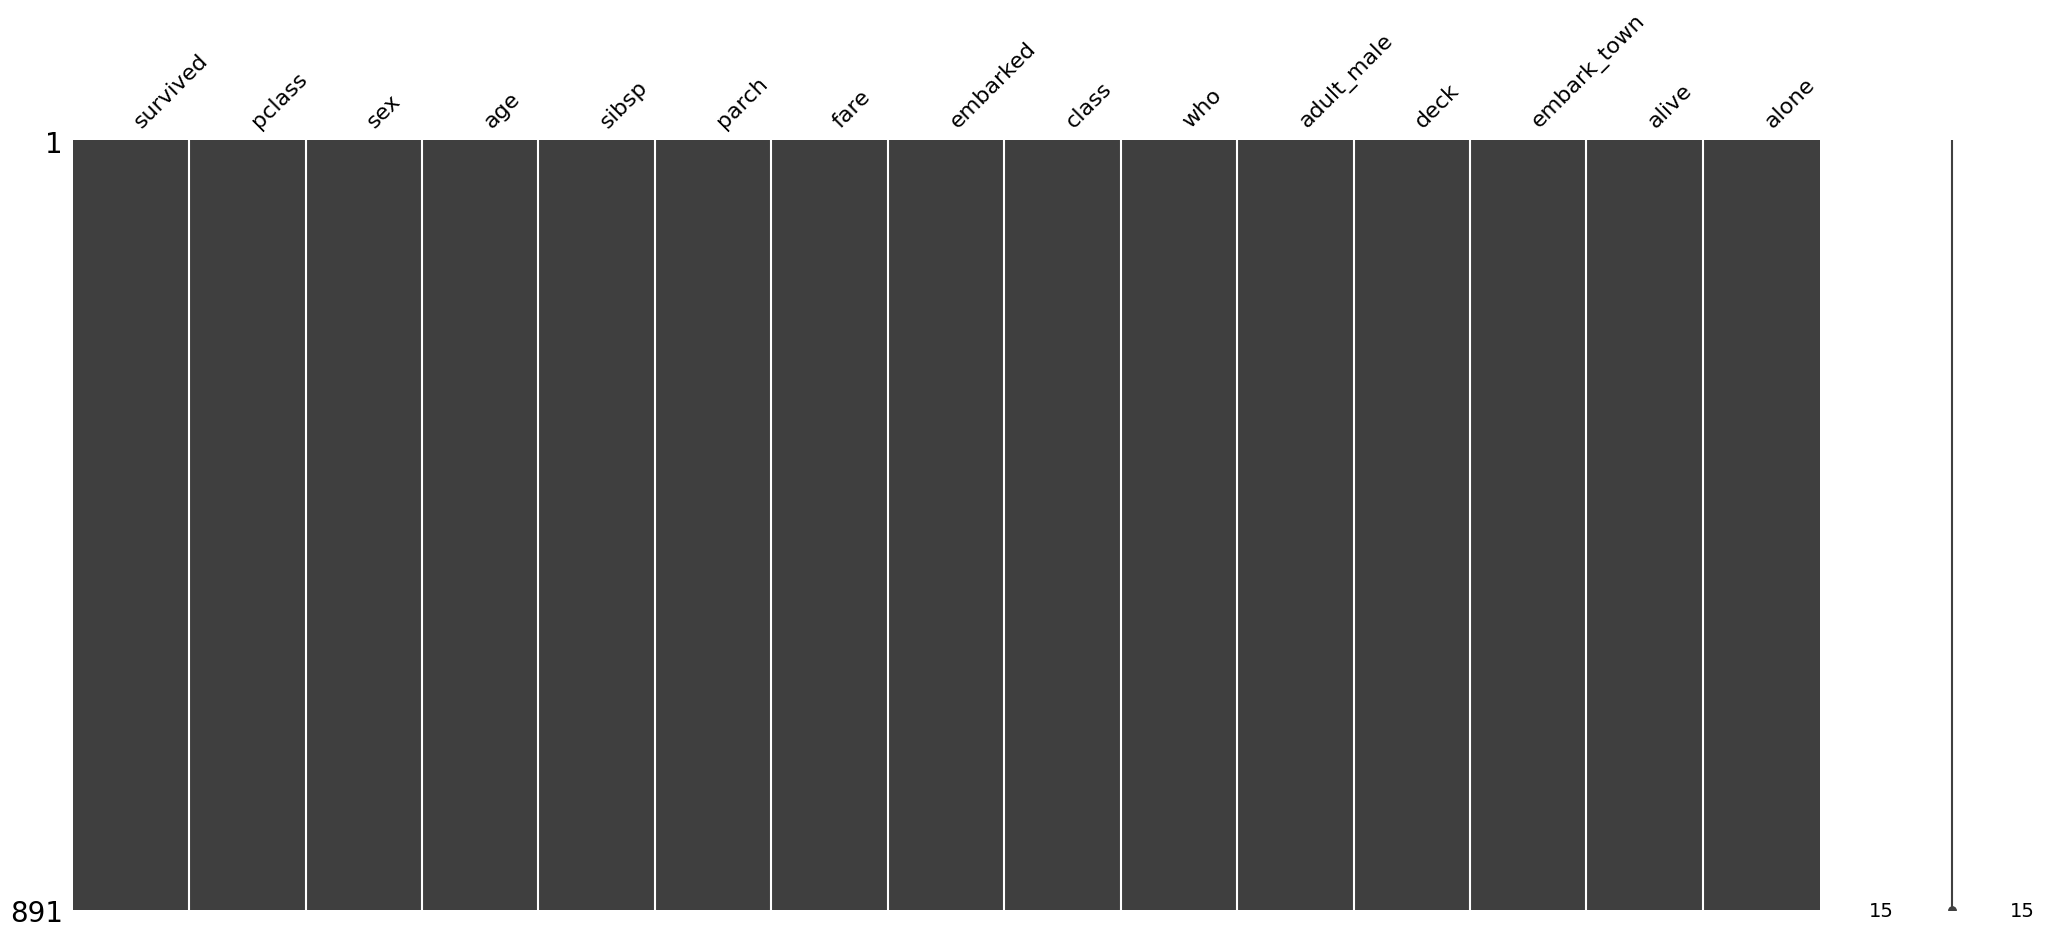

In [14]:
#비대칭인 경우는 중위수를 사용함

imputer_age=SimpleImputer(strategy='median')
titanic['age']=imputer_age.fit_transform(titanic[['age']])

msno.matrix(titanic)

<Axes: >

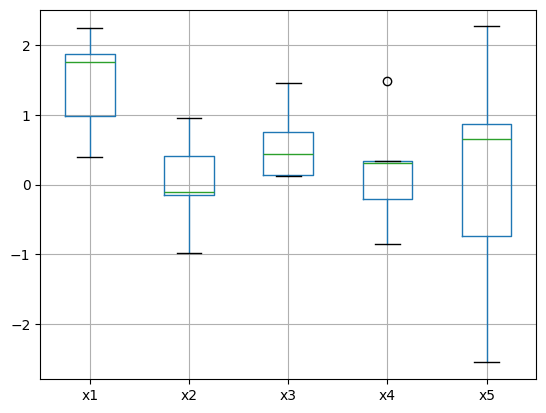

In [15]:
#스케일링 (p.8)
from patsy import demo_data
import pandas as pd

#임의의 실수형 데이터
df=pd.DataFrame(demo_data('x1','x2','x3','x4','x5'))
df

df.boxplot()

<Axes: >

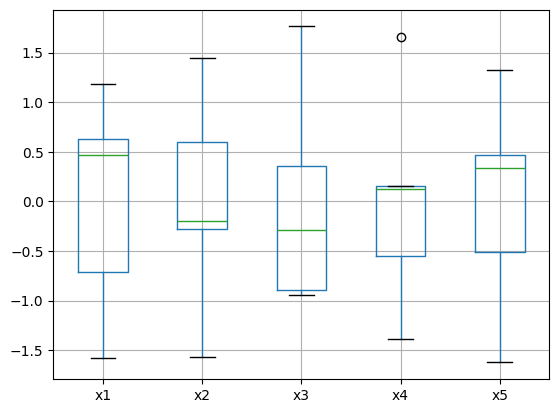

In [16]:
from sklearn.preprocessing import StandardScaler

#평균 0, 표준편차 1이 되도록 스케일링
scaler=StandardScaler()
df2=scaler.fit_transform(df)
df3=pd.DataFrame(df2, columns=df.columns)
df3
df3.boxplot()

In [17]:
import numpy as np
X=np.arange(7).reshape(7,1) #7행 1열로 변환
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [18]:
from sklearn.preprocessing import StandardScaler

#평균 0, 표준편차 1이 되도록 스케일링
scaler=StandardScaler()
X2=scaler.fit_transform(X)
X2

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [19]:
# 이상치(outlier)가 존재할 경우
X2=np.vstack([X, [1000]])   #배열을 세로로 쌓는 함수
X2


array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

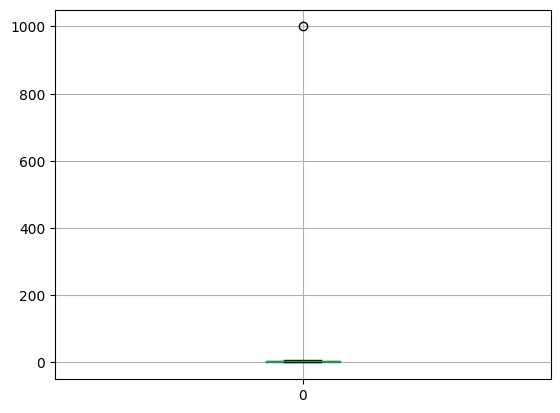

In [20]:
import matplotlib.pyplot as plt
pd.DataFrame(X2).boxplot()
plt.show()

In [21]:
#아웃라이어가 존재할 경우 스케일링을 했을 때 0에 수렴하지 않고 멀어지는 현상이 발생할 수 있다.
#이것은 기계학습 모형의 예측력을 떨어뜨릴 수 있는 요인이 될 수 있다.
scaler.fit_transform(X2)

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

In [23]:
#이상치가 많은 데이터의 경우 RobustScaler를 사용한다.
#중앙값 0, IQR(InterQuartile Range)이 1이 되도록 변환 → 아웃라이어가 있어도 대부분의 데이터가 0 주위로 모이게 된다.
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
X3=scaler.fit_transform(X2)
X3

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

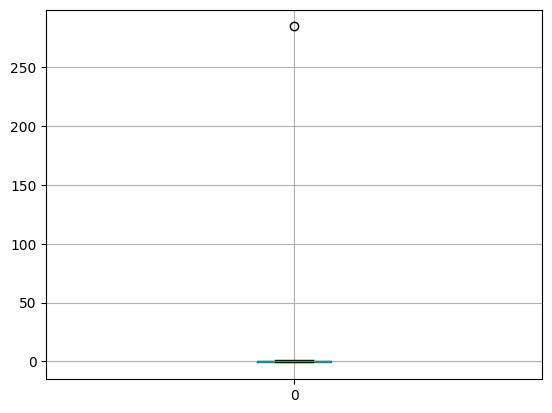

In [24]:
import matplotlib.pyplot as plt
pd.DataFrame(X3).boxplot()
plt.show()  # 1000 => 300으로 감소

In [25]:
# 범주형 데이터의 전처리(p.10)
# 범주형 데이터(카테고리형 데이터) - 성별, 혈액형, 주소 등의 데이터. 기계학습을 위해서는 숫자로 변환해야 함

import pandas as pd
df1=pd.DataFrame(['Male','Female'], columns=['x'])
df1

,x
0,Male
1,Female


In [26]:
df2=pd.get_dummies(df1['x'], prefix='gender')
df2

,gender_Female,gender_Male
0,False,True
1,True,False


In [27]:
df3=pd.DataFrame(["A","B", "AB", "O"], columns=["x"])
df3

,x
0,A
1,B
2,AB
3,O


In [29]:
df4=pd.get_dummies(df3['x'], prefix='blood')
df4

,blood_A,blood_AB,blood_B,blood_O
0,True,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,False,True
